In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# First, load the data

In [2]:
dataset = pd.read_csv('./data/DataScienceCourse_EDPdata.csv',delimiter = ';')
dataset

Turbine_ID                  Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
0             T01  2016-01-02T10:10:00+00:00        258.3        120.3   
1             T11  2016-01-02T10:20:00+00:00        282.3        221.0   
2             T11  2016-01-02T10:30:00+00:00       1391.5        242.8   
3             T09  2016-01-02T10:30:00+00:00       1398.4        231.2   
4             T01  2016-01-02T10:30:00+00:00       1428.7        217.3   
...           ...                        ...          ...          ...   
434140        T06  2017-08-23T09:10:00+00:00       1275.5       1235.4   
434141        T11  2017-08-23T09:30:00+00:00       1669.1       1222.2   
434142        T01  2017-08-23T09:30:00+00:00       1646.1       1220.8   
434143        T11  2017-08-23T09:40:00+00:00       1666.2       1216.2   
434144        T06  2017-08-23T09:40:00+00:00       1633.2       1213.8   

        Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
0             195.4         41.4               30.0                   33   
1             248.8         17.0               28.0                   33   
2             582.2        444.5               28.0                   33   
3             735.4        496.5               28.0                   33   
4             927.5        463.3               30.0                   34   
...             ...          ...                ...                  ...   
434140       1251.2          6.7               49.0                   62   
434141       1426.8        118.2               59.0                   68   
434142       1348.6        118.5               46.0                   65   
434143       1397.9        117.5               59.0                   67   
434144       1341.9        103.0               49.0                   63   

        Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  \
0                        34                   33  ...                    0.0   
1                        33                   33  ...                    0.0   
2                        33                   33  ...                    0.0   
3                        33                   33  ...                    0.0   
4                        34                   34  ...                    0.0   
...                     ...                  ...  ...                    ...   
434140                   64                   64  ...                 -603.7   
434141                   68                   68  ...                 -849.7   
434142                   65                   65  ...                 -307.2   
434143                   68                   68  ...                 -680.5   
434144                   63                   64  ...                 -889.3   

        Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  \
0                         0.0                    0.0                    0.0   
1                         0.0                    0.0                    0.0   
2                      -992.0                  158.7                   40.6   
3                     -1000.0                  341.3                  167.1   
4                     -1000.0                  306.6                  336.9   
...                       ...                    ...                    ...   
434140                -1000.0                  123.1                  849.8   
434141                -1000.0                   11.3                  998.9   
434142                -1000.0                  207.7                  871.9   
434143                -1000.0                   48.3                  987.6   
434144                -1000.0                   14.1                  996.9   

        Grd_Prod_PsbleCap_Max  Grd_Prod_PsbleCap_Min  Grd_Prod_PsbleCap_Std  \
0                         0.0                    0.0                    0.0   
1                         0.0                    0.0                    0.0   
2                       992.0                    0.0      

## Index as timeseries, important for our analysis

In [8]:
dataset.Timestamp = pd.to_datetime(dataset.Timestamp)
dataset.set_index('Timestamp', inplace=True)
dataset.sort_index(inplace=True)
dataset

Turbine_ID  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Timestamp                                                                     
2016-01-01 00:00:00+00:00        T09       1376.7       1234.3       1272.0   
2016-01-01 00:00:00+00:00        T06       1270.0       1232.8       1248.5   
2016-01-01 00:00:00+00:00        T01       1277.4       1226.1       1249.0   
2016-01-01 00:00:00+00:00        T07       1317.5       1229.5       1254.9   
2016-01-01 00:00:00+00:00        T11       1339.4       1233.3       1270.9   
...                              ...          ...          ...          ...   
2017-09-01 00:00:00+00:00        T11       1266.3       1234.3       1250.6   
2017-09-01 00:00:00+00:00        T01       1299.0       1222.1       1255.3   
2017-09-01 00:00:00+00:00        T09       1268.4       1240.1       1251.9   
2017-09-01 00:00:00+00:00        T06       1284.2       1233.4       1252.4   
2017-09-01 00:00:00+00:00        T07       1292.0       1232.5       1251.9   

                           Gen_RPM_Std  Gen_Bear_Temp_Avg  \
Timestamp                                                   
2016-01-01 00:00:00+00:00         24.7               40.0   
2016-01-01 00:00:00+00:00          6.8               42.0   
2016-01-01 00:00:00+00:00          9.0               41.0   
2016-01-01 00:00:00+00:00         13.8               41.0   
2016-01-01 00:00:00+00:00         18.8               42.0   
...                                ...                ...   
2017-09-01 00:00:00+00:00          5.1               46.0   
2017-09-01 00:00:00+00:00         12.4               45.0   
2017-09-01 00:00:00+00:00          6.0               44.0   
2017-09-01 00:00:00+00:00          8.8               49.0   
2017-09-01 00:00:00+00:00          9.6               48.0   

                           Gen_Phase1_Temp_Avg  Gen_Phase2_Temp_Avg  \
Timestamp                                                             
2016-01-01 00:00:00+00:00                   58                   57   
2016-01-01 00:00:00+00:00                   51                   52   
2016-01-01 00:00:00+00:00                   58                   59   
2016-01-01 00:00:00+00:00                   62                   62   
2016-01-01 00:00:00+00:00                   59                   61   
...                                        ...                  ...   
2017-09-01 00:00:00+00:00                   60                   61   
2017-09-01 00:00:00+00:00                   64                   64   
2017-09-01 00:00:00+00:00                   62                   61   
2017-09-01 00:00:00+00:00                   63                   64   
2017-09-01 00:00:00+00:00                   66                   67   

                           Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  ...  \
Timestamp                                                         ...   
2016-01-01 00:00:00+00:00                   58                44  ...   
2016-01-01 00:00:00+00:00                   53                30  ...   
2016-01-01 00:00:00+00:00                   58                30  ...   
2016-01-01 00:00:00+00:00                   61                32  ...   
2016-01-01 00:00:00+00:00                   60                30  ...   
...                                        ...               ...  ...   
2017-09-01 00:00:00+00:00                   61                39  ...   
2017-09-01 00:00:00+00:00                   64                39  ...   
2017-09-01 00:00:00+00:00                   62                51  ...   
2017-09-01 00:00:00+00:00                   65                40  ...   
2017-09-01 00:00:00+00:00                   66                40  ...   

                           Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
Timestamp                                                                 
2016-01-01 00:00:00+00:00                 -224.5                -1000.0   
2016-01-01 00:00:00+00:00                    0.0                 -880.6   
2016-01-01 00:00:00+00:00     

In [28]:
df_T09 = dataset[dataset.Turbine_ID=='T09'] 
#print(df_T09)
df_T09['Timestamp']= pd.to_datetime(df_T09.Timestamp)
df_T09.head()

C:\Users\aeish\.conda\envs\DataScience2020\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
3         T09 2016-01-02 10:30:00+00:00       1398.4        231.2   
10        T09 2016-01-02 12:30:00+00:00        267.2        209.6   
15        T09 2016-01-02 13:40:00+00:00        214.5        119.4   
17        T09 2016-01-02 13:50:00+00:00        203.0        112.8   
25        T09 2016-01-02 15:30:00+00:00        240.6        117.7   

    Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
3         735.4        496.5               28.0                   33   
10        232.8         13.2               35.0                   44   
15        167.3         22.8               29.0                   34   
17        156.7         19.5               28.0                   33   
25        187.6         36.6               28.0                   33   

    Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  \
3                    33                   33  ...                    0.0   
10                   44                   45  ...                    0.0   
15                   34                   34  ...                    0.0   
17                   33                   34  ...                    0.0   
25                   33                   33  ...                    0.0   

    Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  \
3                 -1000.0                  341.3                  167.1   
10                    0.0                    0.0                    0.0   
15                    0.0                    0.0                    0.0   
17                    0.0                    0.0                    0.0   
25                    0.0                    0.0                    0.0   

    Grd_Prod_PsbleCap_Max  Grd_Prod_PsbleCap_Min  Grd_Prod_PsbleCap_Std  \
3                  1000.0                    0.0                  341.3   
10                    0.0                    0.0                    0.0   
15                    0.0                    0.0                    0.0   
17                    0.0                    0.0                    0.0   
25                    0.0                    0.0                    0.0   

    Gen_Bear2_Temp_Avg  Nac_Direction_Avg  Status_Flag  
3                   27                0.1          1.0  
10                  31               12.8          2.0  
15                  27               39.1          2.0  
17                  27               39.1          2.0  
25                  27                7.2          2.0  

[5 rows x 84 columns]

In [29]:
#df_T09.sort_index(inplace=True)

In [31]:
df_T09 = df_T09.set_index('Timestamp')
#df_T09.sort_index(inplace=True)
df_T09.tail()

Turbine_ID  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Timestamp                                                                     
2017-08-23 03:10:00+00:00        T09       1681.6       1464.1       1614.3   
2017-08-23 04:10:00+00:00        T09       1471.8       1237.7       1302.7   
2017-08-23 05:30:00+00:00        T09       1679.1       1299.8       1529.2   
2017-08-23 08:40:00+00:00        T09       1282.1       1228.6       1250.6   
2017-08-23 09:10:00+00:00        T09       1619.2       1218.6       1343.0   

                           Gen_RPM_Std  Gen_Bear_Temp_Avg  \
Timestamp                                                   
2017-08-23 03:10:00+00:00         56.5               51.0   
2017-08-23 04:10:00+00:00         47.3               51.0   
2017-08-23 05:30:00+00:00        103.8               51.0   
2017-08-23 08:40:00+00:00          9.5               48.0   
2017-08-23 09:10:00+00:00        103.0               46.0   

                           Gen_Phase1_Temp_Avg  Gen_Phase2_Temp_Avg  \
Timestamp                                                             
2017-08-23 03:10:00+00:00                   74                   73   
2017-08-23 04:10:00+00:00                   73                   72   
2017-08-23 05:30:00+00:00                   74                   73   
2017-08-23 08:40:00+00:00                   67                   66   
2017-08-23 09:10:00+00:00                   67                   66   

                           Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  ...  \
Timestamp                                                         ...   
2017-08-23 03:10:00+00:00                   74                52  ...   
2017-08-23 04:10:00+00:00                   73                51  ...   
2017-08-23 05:30:00+00:00                   74                51  ...   
2017-08-23 08:40:00+00:00                   67                51  ...   
2017-08-23 09:10:00+00:00                   67                50  ...   

                           Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
Timestamp                                                                 
2017-08-23 03:10:00+00:00                -1000.0                -1000.0   
2017-08-23 04:10:00+00:00                -1000.0                -1000.0   
2017-08-23 05:30:00+00:00                -1000.0                -1000.0   
2017-08-23 08:40:00+00:00                  -51.3                -1000.0   
2017-08-23 09:10:00+00:00                 -380.5                -1000.0   

                           Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  \
Timestamp                                                                 
2017-08-23 03:10:00+00:00                    0.0                 1000.0   
2017-08-23 04:10:00+00:00                    0.0                 1000.0   
2017-08-23 05:30:00+00:00                    0.0                 1000.0   
2017-08-23 08:40:00+00:00                  271.0                  618.8   
2017-08-23 09:10:00+00:00                   94.8                  977.4   

                           Grd_Prod_PsbleCap_Max  Grd_Prod_PsbleCap_Min  \
Timestamp                                                                 
2017-08-23 03:10:00+00:00                 1000.0                 1000.0   
2017-08-23 04:10:00+00:00                 1000.0                 1000.0   
2017-08-23 05:30:00+00:00                 1000.0                 1000.0   
2017-08-23 08:40:00+00:00                 1000.0                   51.3   
2017-08-23 09:10:00+00:00                 1000.0                  380.5   

                           Grd_Prod_PsbleCap_Std  Gen_Bear2_Temp_Avg  \
Timestamp                                                              
2017-08-23 03:10:00+00:00                    0.0                  47   
2017-08-23 04:10:00+00:00                    0.0                  47   
2017-08-23 05:30:00+00:00                    0.0                  47   
2017-08-23 08:40:00+00:00                  271.0                  45   
2017-08-23 09:10:00+00:0

In [12]:
df_T09.index = pd.to_datetime(df_T09.index)

In [13]:
df_T09.tail()

Turbine_ID                  Timestamp  \
1970-01-01 00:00:00.000434105        T09  2017-08-23T03:10:00+00:00   
1970-01-01 00:00:00.000434109        T09  2017-08-23T04:10:00+00:00   
1970-01-01 00:00:00.000434115        T09  2017-08-23T05:30:00+00:00   
1970-01-01 00:00:00.000434135        T09  2017-08-23T08:40:00+00:00   
1970-01-01 00:00:00.000434139        T09  2017-08-23T09:10:00+00:00   

                               Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
1970-01-01 00:00:00.000434105       1681.6       1464.1       1614.3   
1970-01-01 00:00:00.000434109       1471.8       1237.7       1302.7   
1970-01-01 00:00:00.000434115       1679.1       1299.8       1529.2   
1970-01-01 00:00:00.000434135       1282.1       1228.6       1250.6   
1970-01-01 00:00:00.000434139       1619.2       1218.6       1343.0   

                               Gen_RPM_Std  Gen_Bear_Temp_Avg  \
1970-01-01 00:00:00.000434105         56.5               51.0   
1970-01-01 00:00:00.000434109         47.3               51.0   
1970-01-01 00:00:00.000434115        103.8               51.0   
1970-01-01 00:00:00.000434135          9.5               48.0   
1970-01-01 00:00:00.000434139        103.0               46.0   

                               Gen_Phase1_Temp_Avg  Gen_Phase2_Temp_Avg  \
1970-01-01 00:00:00.000434105                   74                   73   
1970-01-01 00:00:00.000434109                   73                   72   
1970-01-01 00:00:00.000434115                   74                   73   
1970-01-01 00:00:00.000434135                   67                   66   
1970-01-01 00:00:00.000434139                   67                   66   

                               Gen_Phase3_Temp_Avg  ...  \
1970-01-01 00:00:00.000434105                   74  ...   
1970-01-01 00:00:00.000434109                   73  ...   
1970-01-01 00:00:00.000434115                   74  ...   
1970-01-01 00:00:00.000434135                   67  ...   
1970-01-01 00:00:00.000434139                   67  ...   

                               Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
1970-01-01 00:00:00.000434105                -1000.0                -1000.0   
1970-01-01 00:00:00.000434109                -1000.0                -1000.0   
1970-01-01 00:00:00.000434115                -1000.0                -1000.0   
1970-01-01 00:00:00.000434135                  -51.3                -1000.0   
1970-01-01 00:00:00.000434139                 -380.5                -1000.0   

                               Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  \
1970-01-01 00:00:00.000434105                    0.0                 1000.0   
1970-01-01 00:00:00.000434109                    0.0                 1000.0   
1970-01-01 00:00:00.000434115                    0.0                 1000.0   
1970-01-01 00:00:00.000434135                  271.0                  618.8   
1970-01-01 00:00:00.000434139                   94.8                  977.4   

                               Grd_Prod_PsbleCap_Max  Grd_Prod_PsbleCap_Min  \
1970-01-01 00:00:00.000434105                 1000.0                 1000.0   
1970-01-01 00:00:00.000434109                 1000.0                 1000.0   
1970-01-01 00:00:00.000434115                 1000.0                 1000.0   
1970-01-01 00:00:00.000434135                 1000.0                   51.3   
1970-01-01 00:00:00.000434139                 1000.0                  380.5   

                               Grd_Prod_PsbleCap_Std  Gen_Bear2_Temp_Avg  \
1970-01-01 00:00:00.000434105                    0.0                  47   
1970-01-01 00:00:00.000434109                    0.0                  47   
1970-01-01 00:00:00.000434115                    0.0                  47   
1970-01-01 00:00:00.000434135                  271.0                  45   
1970-01-01 00:00:00.000434139                   94.8                  44   

                               Nac_Direction_Avg  Status_Flag  
1970-01-01 00:00:00.0004341

## Let's see what type of information we have available within the dataset

In [9]:
print('Turbines: ', dataset.Turbine_ID.unique())
print('channels: ', dataset.columns.values)

Turbines:  ['T09' 'T06' 'T01' 'T07' 'T11']
channels:  ['Turbine_ID' 'Gen_RPM_Max' 'Gen_RPM_Min' 'Gen_RPM_Avg' 'Gen_RPM_Std'
 'Gen_Bear_Temp_Avg' 'Gen_Phase1_Temp_Avg' 'Gen_Phase2_Temp_Avg'
 'Gen_Phase3_Temp_Avg' 'Hyd_Oil_Temp_Avg' 'Gear_Oil_Temp_Avg'
 'Gear_Bear_Temp_Avg' 'Nac_Temp_Avg' 'Rtr_RPM_Max' 'Rtr_RPM_Min'
 'Rtr_RPM_Avg' 'Amb_WindSpeed_Max' 'Amb_WindSpeed_Min' 'Amb_WindSpeed_Avg'
 'Amb_WindSpeed_Std' 'Amb_WindDir_Relative_Avg' 'Amb_WindDir_Abs_Avg'
 'Amb_Temp_Avg' 'Prod_LatestAvg_ActPwrGen0' 'Prod_LatestAvg_ActPwrGen1'
 'Prod_LatestAvg_ActPwrGen2' 'Prod_LatestAvg_TotActPwr'
 'Prod_LatestAvg_ReactPwrGen0' 'Prod_LatestAvg_ReactPwrGen1'
 'Prod_LatestAvg_ReactPwrGen2' 'Prod_LatestAvg_TotReactPwr'
 'HVTrafo_Phase1_Temp_Avg' 'HVTrafo_Phase2_Temp_Avg'
 'HVTrafo_Phase3_Temp_Avg' 'Grd_InverterPhase1_Temp_Avg'
 'Cont_Top_Temp_Avg' 'Cont_Hub_Temp_Avg' 'Cont_VCP_Temp_Avg'
 'Gen_SlipRing_Temp_Avg' 'Spin_Temp_Avg' 'Blds_PitchAngle_Min'
 'Blds_PitchAngle_Max' 'Blds_PitchAngle_Avg' 'Blds_Pitch

## How the power time series (per turbine) looks like

Exploratory data analysis on 10min average power per turbine

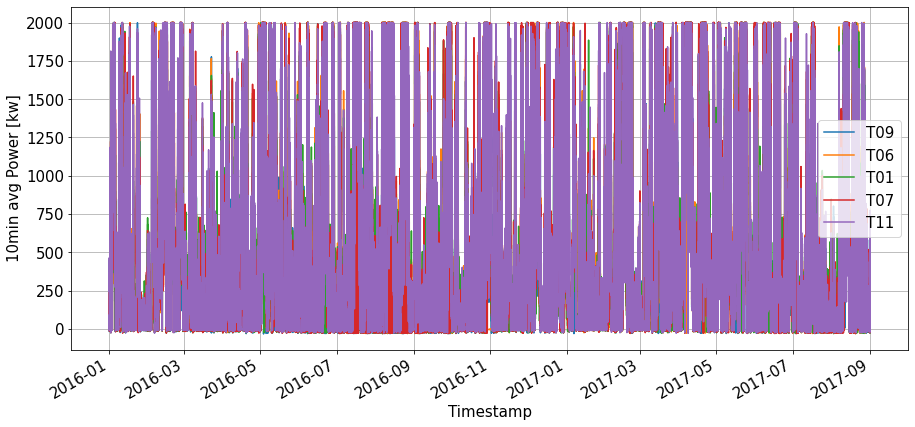

In [13]:
plt.rc('font', size=15) 
fig,ax = plt.subplots(figsize = (15,7))

for turbine in dataset.Turbine_ID.unique():
    dataset[dataset.Turbine_ID==turbine].Grd_Prod_Pwr_Avg.plot(label=turbine, ax=ax)
 
plt.ylabel('10min avg Power [kw]')
plt.grid()
plt.legend()
plt.show()


# Power forecasting problem
# $\rightarrow$ let's extract the power time series from the dataset

Time series are provided per turbine, where we are trying to forecast the aggregated production at the wind farm

In [33]:
dataset_power_WF = dataset[['Grd_Prod_Pwr_Avg', 'Grd_Prod_Pwr_Min', 'Grd_Prod_Pwr_Max']].groupby(level=0).sum()
dataset_power_WF['Grd_Prod_Pwr_Std'] = np.sqrt((dataset['Grd_Prod_Pwr_Std']**2).groupby(level=0).sum())
dataset_power_WF

Grd_Prod_Pwr_Avg  Grd_Prod_Pwr_Min  \
Timestamp                                                       
2016-01-01 00:00:00+00:00             645.9             137.3   
2016-01-01 00:10:00+00:00             650.3             179.8   
2016-01-01 00:20:00+00:00             843.1             353.1   
2016-01-01 00:30:00+00:00            1234.1             497.9   
2016-01-01 00:40:00+00:00            1363.9             628.2   
...                                     ...               ...   
2017-08-31 23:20:00+00:00            1104.8             580.2   
2017-08-31 23:30:00+00:00             720.0             265.5   
2017-08-31 23:40:00+00:00             505.0              86.8   
2017-08-31 23:50:00+00:00             638.9             209.1   
2017-09-01 00:00:00+00:00             935.5             421.8   

                           Grd_Prod_Pwr_Max  Grd_Prod_Pwr_Std  
Timestamp                                                      
2016-01-01 00:00:00+00:00            1292.0        121.107308  
2016-01-01 00:10:00+00:00            1382.5        119.110579  
2016-01-01 00:20:00+00:00            1466.7        115.687986  
2016-01-01 00:30:00+00:00            2033.3        149.047778  
2016-01-01 00:40:00+00:00            2142.1        154.499773  
...                                     ...               ...  
2017-08-31 23:20:00+00:00            1766.2        138.041805  
2017-08-31 23:30:00+00:00            1245.7        112.564382  
2017-08-31 23:40:00+00:00            1183.2        127.530114  
2017-08-31 23:50:00+00:00            1346.2        111.351471  
2017-09-01 00:00:00+00:00            1445.5        114.206786  

[87342 rows x 4 columns]

# Let's choose a subset of data as our potential input and ouput

The produced power at a turbine is highly correlated to the wind speed, as well as to the air density: 

\begin{equation}
Power = \frac{1}{2} \rho C_p A U^3 
\end{equation}

where:
<br> $\rho$ is the air density, 
<br> $C_p$ is the power coefficient (specific to the turbine model),
<br> $A$ is the area of the turbine rotor, and
<br> $U$ is the wind speed. 

Let's define a single input model (for now).
***
INPUTS:   
   1. Power(previous time steps) $\rightarrow$ **Grd_Prod_Pwr_Avg**

OUTPUT:
   1. Power(future time steps) $\rightarrow$ **Grd_Prod_Pwr_Avg**
